In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
#%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
#!kaggle datasets download -d fantacher/neu-metal-surface-defects-data

 71% 41.0M/57.4M [00:00<00:00, 66.3MB/s]
100% 57.4M/57.4M [00:00<00:00, 107MB/s] 


In [ ]:
#mengekstraksi data yang sebelumnya diunduh
#import zipfile,os
#local_zip = '/content/drive/MyDrive/Colab Notebooks/neu-metal-surface-defects-data.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall()
#zip_ref.close()

In [ ]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/NEU Metal Surface Defects Data/valid/Crazing'))

12

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/NEU Metal Surface Defects Data/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/NEU Metal Surface Defects Data/valid'

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'   
)

valid_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

#menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(200,200), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    class_mode='categorical' #karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode='categorical'    
)
validation_generator = valid_datagen.flow_from_directory(
    val_dir, #direktori data validasi
    target_size=(200,200), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    class_mode='categorical' #karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode='categorical'    
)

# model.save('model.h5')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
#membuat arsitektur CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)), 
  tf.keras.layers.MaxPooling2D(2, 2), 
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'), 
  tf.keras.layers.Dense(6, activation='softmax') # softmax karena hanya terdapat lebih dari 2 kelas. yaitu, rock, paper, and scissors                                
])

#menggunakan transfer learning
from tensorflow.keras.applications import xception
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
transfer_model = tf.keras.applications.xception.Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(200,200,3),
    pooling='avg'
)
transfer_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
transfer_model.trainable = False
model = Sequential()
model.add(transfer_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# model=tf.keras.models.load_model('model.h5')
model.compile(loss='categorical_crossentropy', #categorical_crossentropy digunakan untuk loss function pada kasus klasifikasi 3 kelas atau lebih
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'])

#menggunakan Callback, untuk menentukan model yang dilatih akan berhenti jika akurasi telah mencapai >95%
class useCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95% !")
      self.model.stop_training = True
callbacks = useCallback()

#melatih model menggunakan metode fit
hist = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=10,
    verbose = 2,
    callbacks = [callbacks] 
)


Epoch 1/50
25/25 - 18s - loss: 1.1940 - accuracy: 0.5800 - val_loss: 0.5024 - val_accuracy: 0.9250
Epoch 2/50
25/25 - 14s - loss: 0.4946 - accuracy: 0.8300 - val_loss: 0.2986 - val_accuracy: 0.9250
Epoch 3/50
25/25 - 12s - loss: 0.2594 - accuracy: 0.9300 - val_loss: 0.1477 - val_accuracy: 1.0000
Epoch 4/50
25/25 - 13s - loss: 0.2457 - accuracy: 0.9000 - val_loss: 0.0680 - val_accuracy: 1.0000
Epoch 5/50
25/25 - 9s - loss: 0.1327 - accuracy: 0.9800 - val_loss: 0.0846 - val_accuracy: 0.9750

Akurasi telah mencapai >95% !


<function matplotlib.pyplot.show>

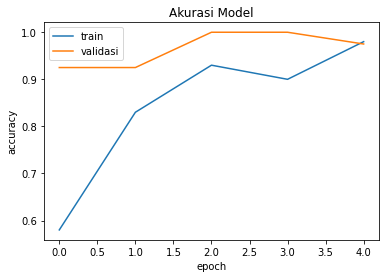

In [ ]:
#plot akurasi

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show

<function matplotlib.pyplot.show>

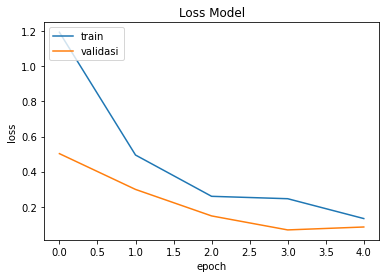

In [ ]:
#plot loss

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show

In [ ]:

from sklearn.datasets import load_files
import numpy as np

test_dir = '/content/drive/MyDrive/Colab Notebooks/NEU Metal Surface Defects Data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [ ]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [ ]:
x_test = x_test.astype('float32')/255

In [ ]:
y_pred = model.predict(x_test)

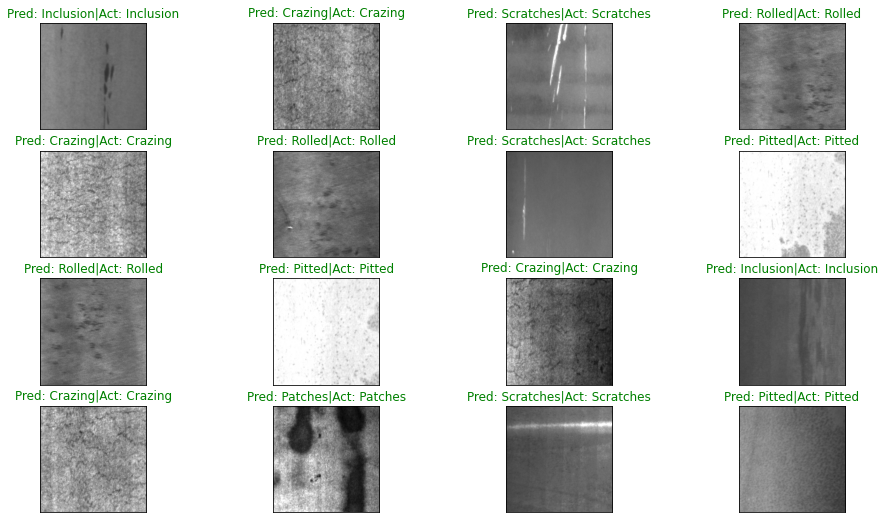

In [ ]:
# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("Pred: {}|Act: {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load the image
img = load_img('rol.JPG', target_size=(200, 200))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 200, 200, 3)
# center pixel data
img = img.astype('float32')/255
 
# predict the class
result = model.predict(img)
target_labels[np.argmax(result)]